In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('cardio_train.csv',sep=';')
df.head() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
df.rename(columns = {'ap_hi':'Systolic',
                         'ap_lo':'Diastolic',
                         'gluc':'Glucose',
                         'alco':'Alcohol',
                         'active':'Physical_activity',
                         'cardio':'CV_disease'},
              inplace = True)

In [6]:
print(df.columns.values)

['id' 'age' 'gender' 'height' 'weight' 'Systolic' 'Diastolic'
 'cholesterol' 'Glucose' 'smoke' 'Alcohol' 'Physical_activity'
 'CV_disease']


In [7]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   age                70000 non-null  int64  
 2   gender             70000 non-null  int64  
 3   height             70000 non-null  int64  
 4   weight             70000 non-null  float64
 5   Systolic           70000 non-null  int64  
 6   Diastolic          70000 non-null  int64  
 7   cholesterol        70000 non-null  int64  
 8   Glucose            70000 non-null  int64  
 9   smoke              70000 non-null  int64  
 10  Alcohol            70000 non-null  int64  
 11  Physical_activity  70000 non-null  int64  
 12  CV_disease         70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df = df.set_index("id")

In [9]:
#Age in days is not easy to understand Lets make new column called year where age in days is converted into age in year
df['age'] = (df['age'] / 365).round().astype('int')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.338686,6.765294,30.0,48.0,54.0,58.0,65.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
Systolic,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
Diastolic,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
Glucose,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
Alcohol,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [11]:
df['CV_disease'].value_counts()

0    35021
1    34979
Name: CV_disease, dtype: int64

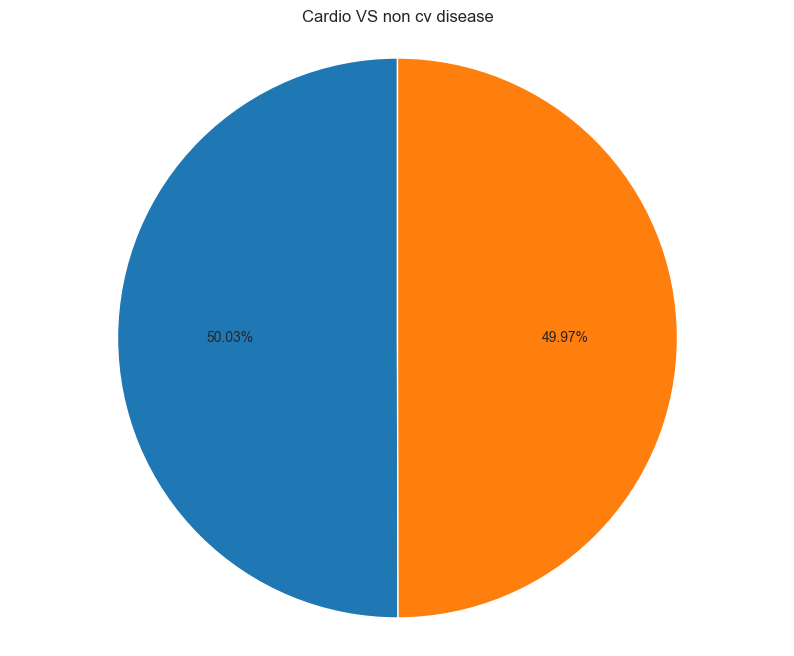

In [12]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
plt.pie(df['CV_disease'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("Cardio VS non cv disease")
plt.show()

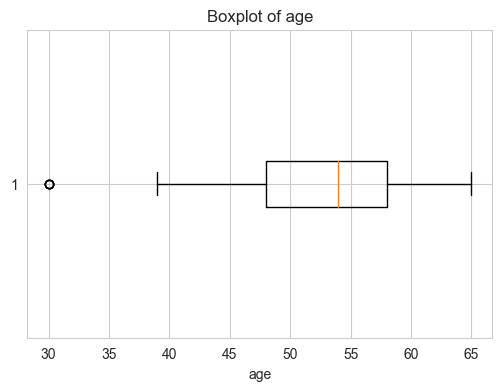

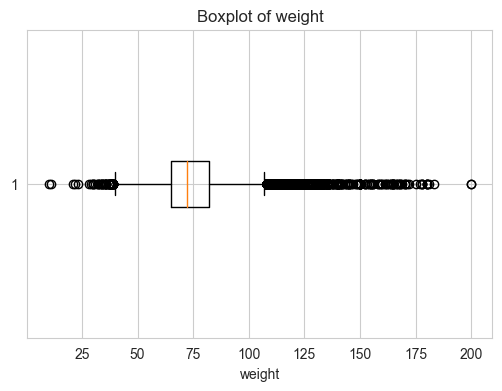

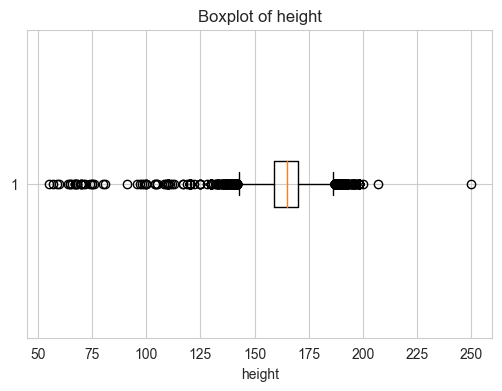

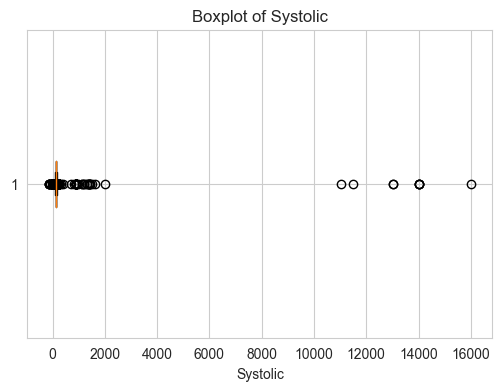

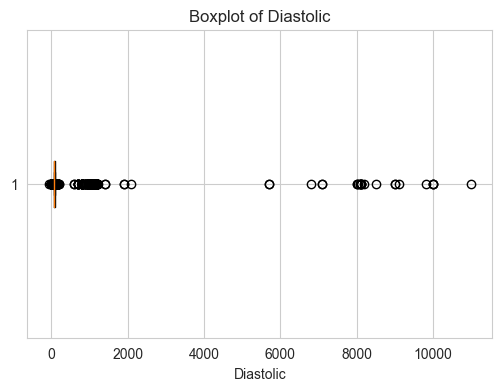

In [13]:
columns_to_plot = ['age', 'weight', 'height', 'Systolic', 'Diastolic']

# Loop through columns and create boxplot for each
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

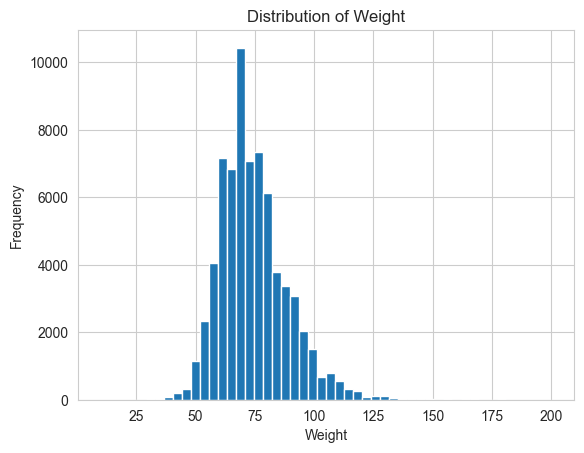

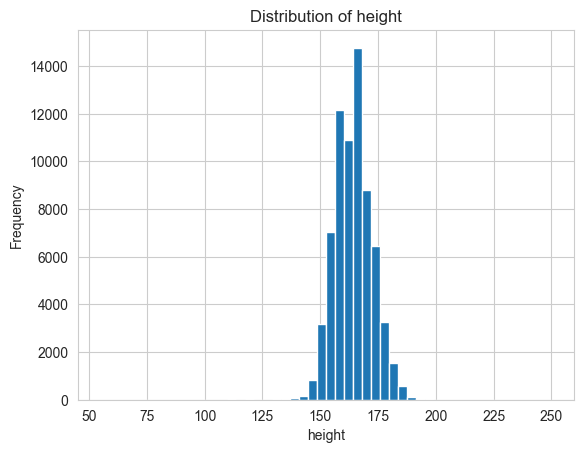

In [14]:
# Plot histogram of weight variable with 50 bins
plt.hist(df['weight'], bins=50)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of height variable with 50 bins
plt.hist(df['height'], bins=50)
plt.title('Distribution of height')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.show()

In [15]:
data = df.copy()

In [16]:
# Import necessary libraries
import pandas as pd

# Remove outliers for height that fall below 2.5 and above 97.5 percentile of a given range.
data.drop(data[(data['height'] > data['height'].quantile(0.975))].index, inplace=True)
data.drop(data[(data['height'] < data['height'].quantile(0.025))].index, inplace=True)

# Remove outliers for weight that fall below 2.5 and above 97.5 percentile of a given range.
data.drop(data[(data['weight'] > data['weight'].quantile(0.975))].index, inplace=True)
data.drop(data[(data['weight'] < data['weight'].quantile(0.025))].index, inplace=True)

# Removing outliers for diastolic that fall below 2.5 and above 97.5 percentile of a given range.
data.drop(data[(data['Diastolic'] > data['Diastolic'].quantile(0.975))].index, inplace=True)
data.drop(data[(data['Diastolic'] < data['Diastolic'].quantile(0.025))].index, inplace=True)

# Removing outliers for systolic that fall below 2.5 and above 97.5 percentile of a given range.
data.drop(data[(data['Systolic'] > data['Systolic'].quantile(0.975))].index, inplace=True)
data.drop(data[(data['Systolic'] < data['Systolic'].quantile(0.025))].index, inplace=True)

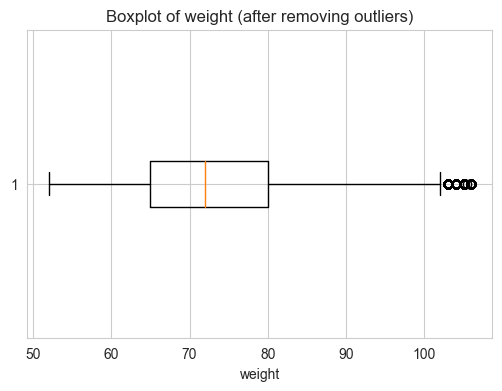

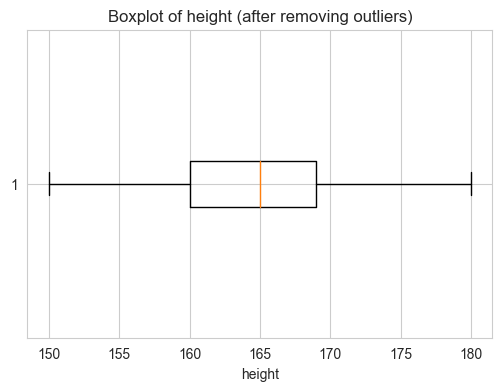

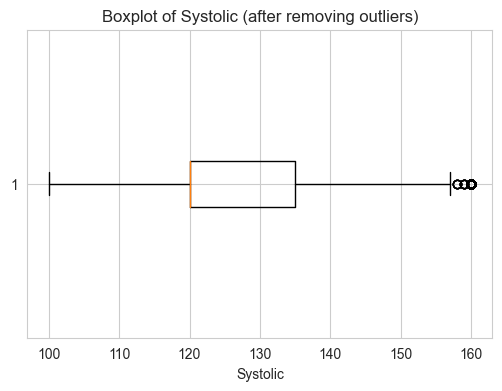

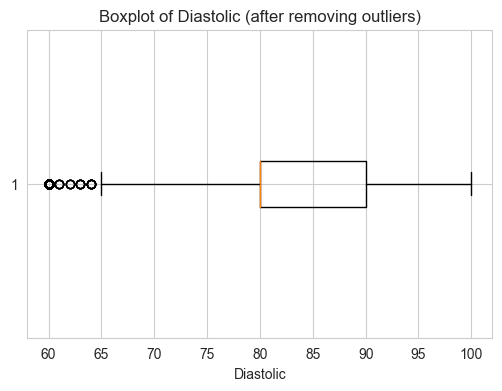

In [17]:
columns_to_plot = ['weight','height', 'Systolic', 'Diastolic']

# Loop through columns and create boxplot for each
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column], vert=False)
    plt.title(f'Boxplot of {column} (after removing outliers)')
    plt.xlabel(column)
    plt.show()

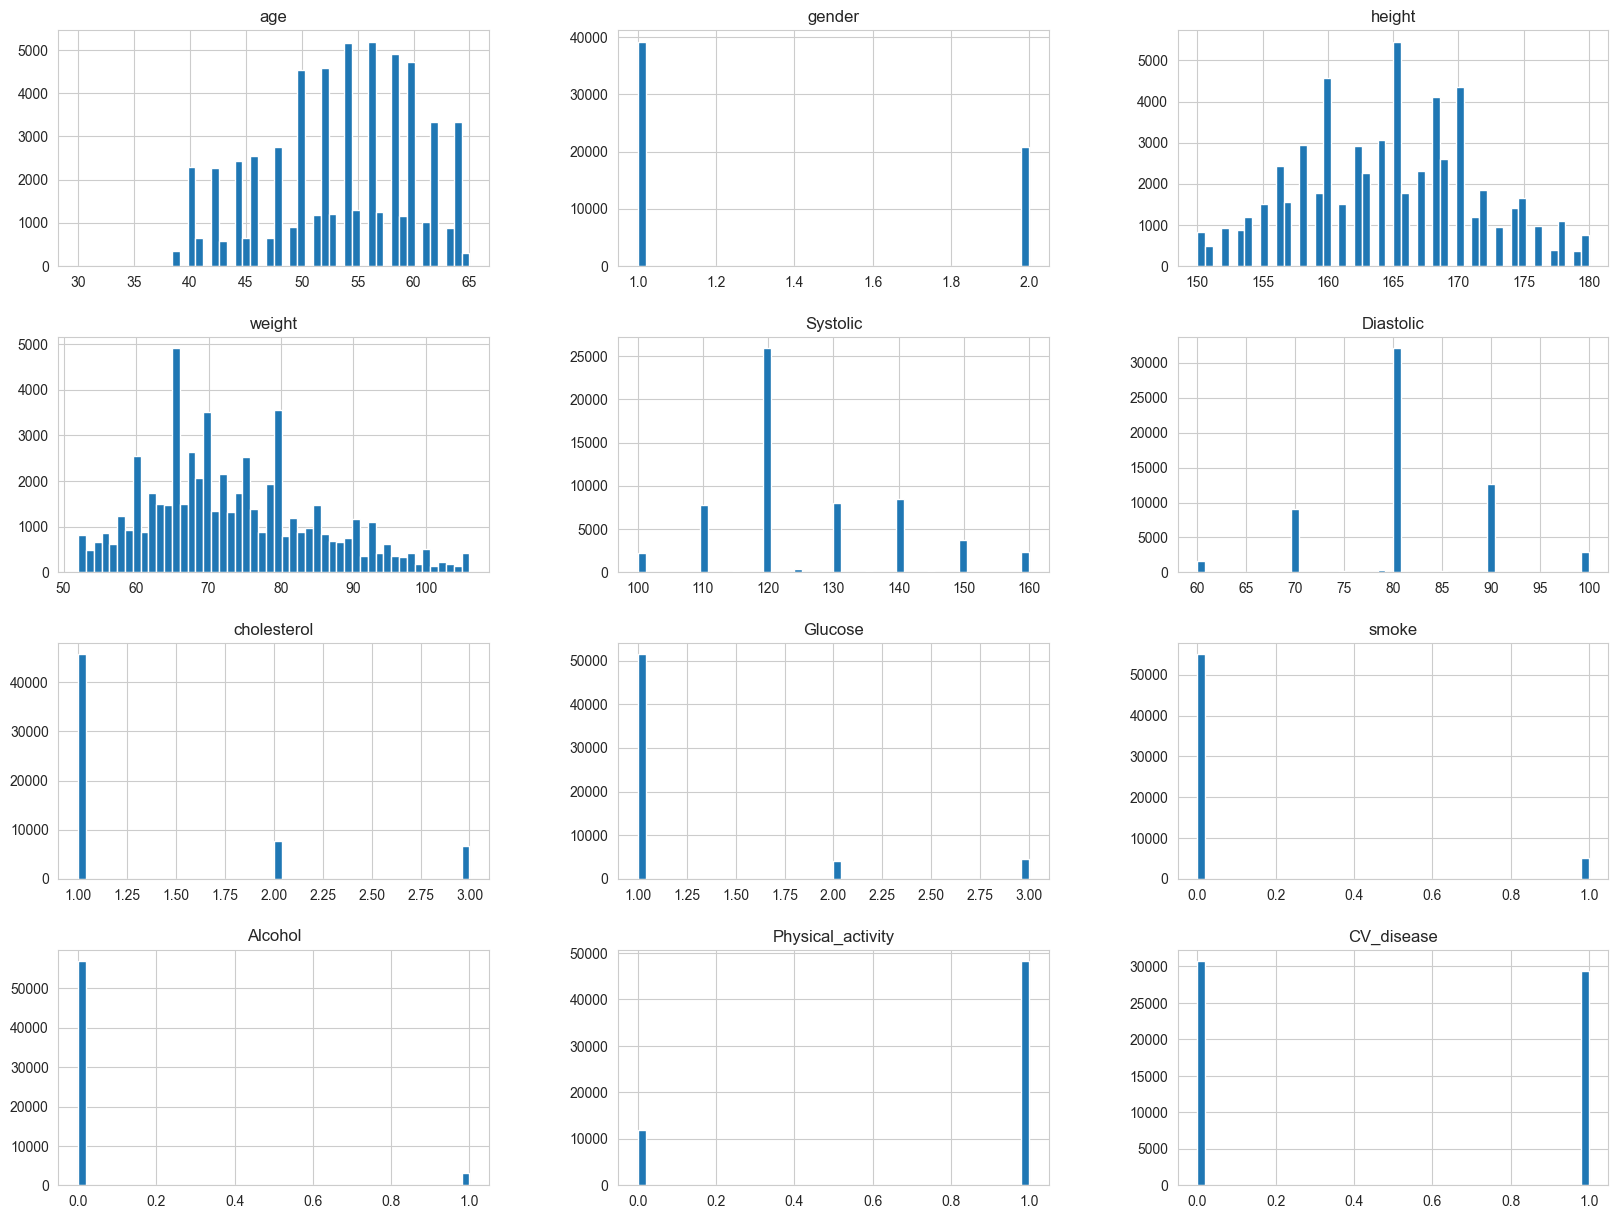

In [18]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'Systolic', 'Diastolic',
       'cholesterol', 'Glucose', 'smoke', 'Alcohol', 'Physical_activity',
       'CV_disease'],
      dtype='object')

In [20]:
data["BMI"] = ((data["weight"] * 10000) / ((data['height'])**2))

In [21]:
data['MAP'] = ((data['Systolic']) + (data['Diastolic'] * 2))/3

In [22]:
data.describe()

,age,gender,height,weight,Systolic,Diastolic,cholesterol,Glucose,smoke,Alcohol,Physical_activity,CV_disease,BMI,MAP
count,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000
mean,53.338356,1.347303,164.555245,73.425961,125.764452,81.045051,1.350911,1.220232,0.085595,0.051869,0.803665,0.488159,27.170179,95.951518
std,6.746884,0.476117,6.830490,11.615004,13.754923,8.237845,0.670020,0.567630,0.279767,0.221765,0.397228,0.499864,4.404572,9.285797
min,30.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.049383,73.333333
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,93.333333
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.259585,93.333333
75%,58.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.752066,103.333333
max,65.000000,2.000000,180.000000,106.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,46.666667,120.000000


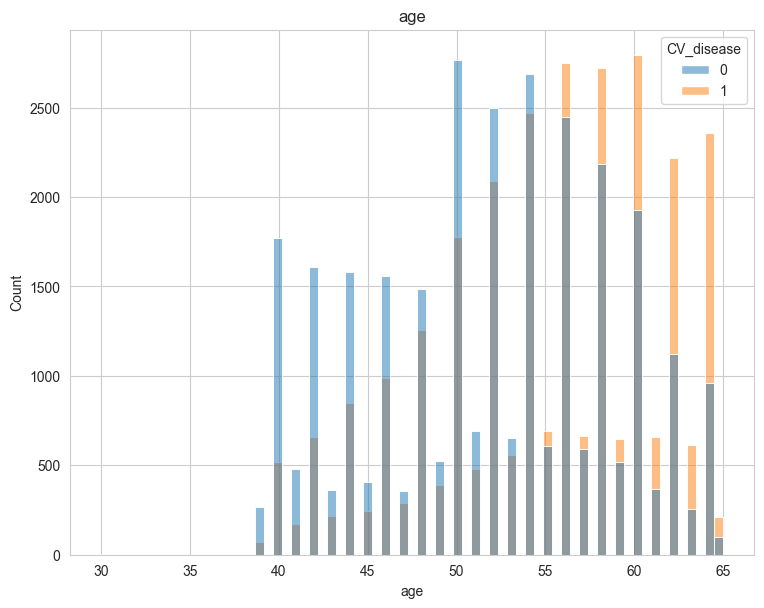

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
column = ['age', 'gender', 'height', 'weight', 'Systolic', 'Diastolic', 'cholestrol', 'Glucose,', 'smoke', 'Alcohol', 'Physical_activity', 'BMI', 'MAP']
plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[0]], hue="CV_disease")
plt.title(column[0])
plt.show()

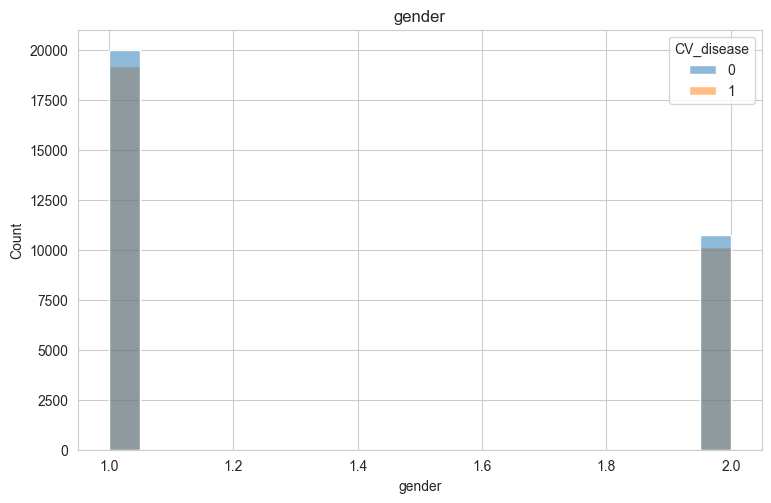

In [24]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[1]], hue="CV_disease")
plt.title(column[1])
plt.show()

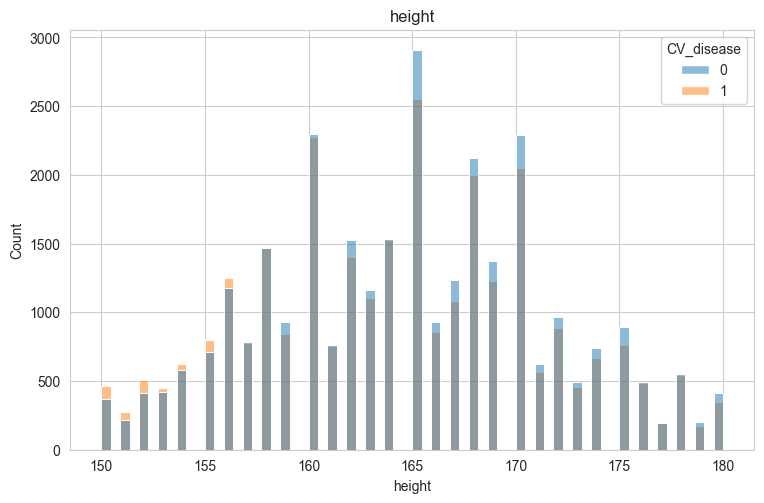

In [25]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[2]], hue="CV_disease")
plt.title(column[2])
plt.show()

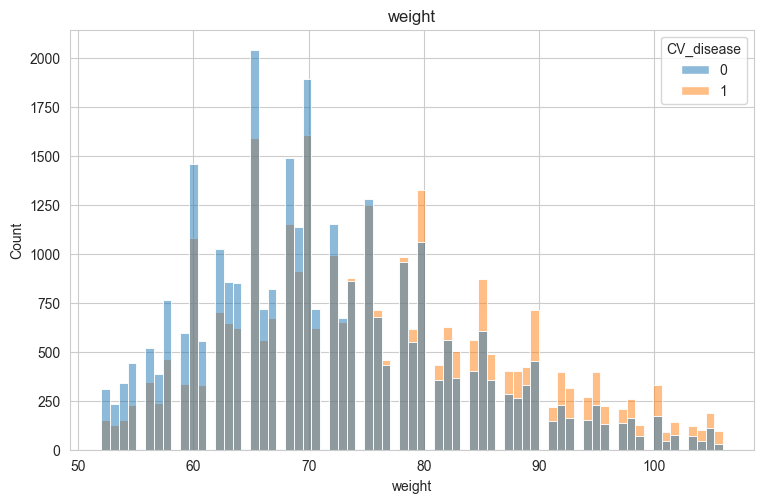

In [26]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[3]], hue="CV_disease")
plt.title(column[3])
plt.show()

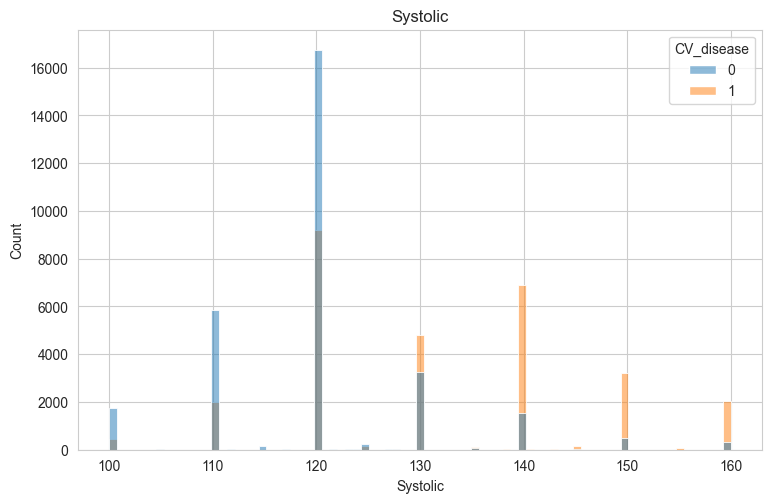

In [27]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[4]], hue="CV_disease")
plt.title(column[4])
plt.show()

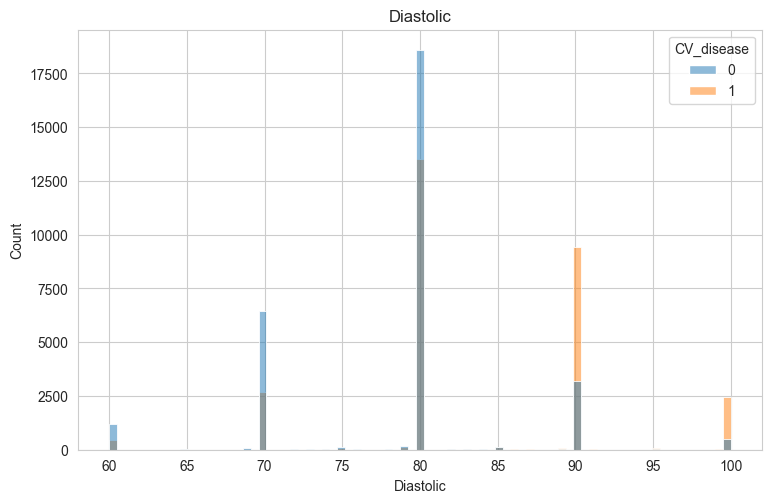

In [28]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[5]], hue="CV_disease")
plt.title(column[5])
plt.show()

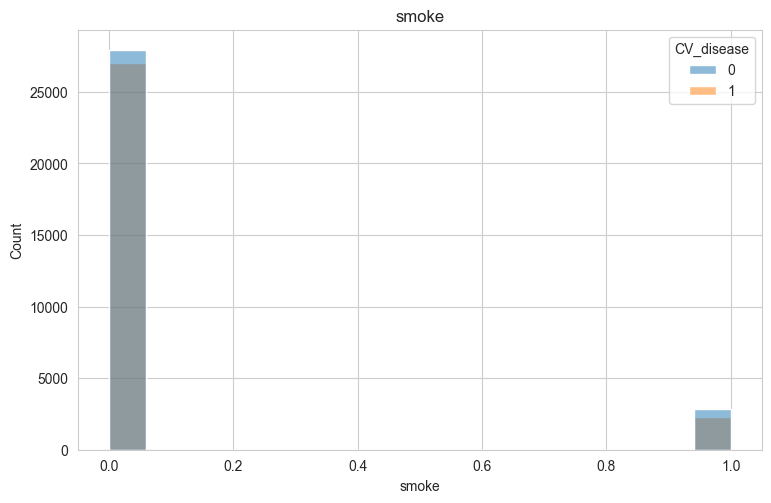

In [29]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[8]], hue="CV_disease")
plt.title(column[8])
plt.show()

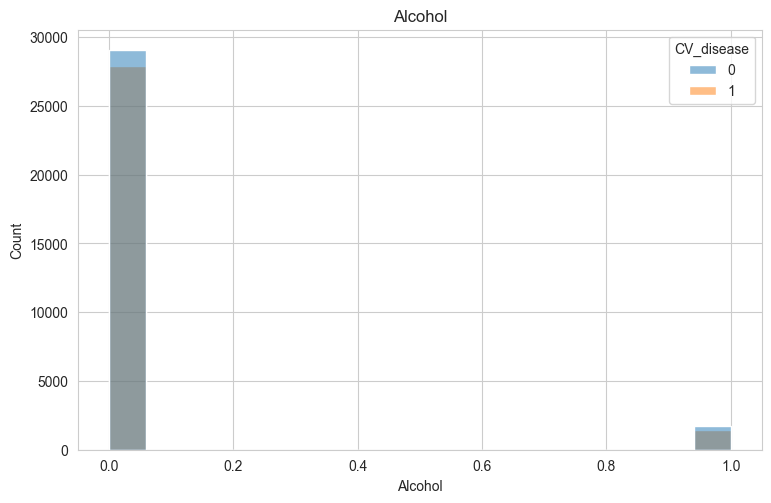

In [30]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[9]], hue="CV_disease")
plt.title(column[9])
plt.show()

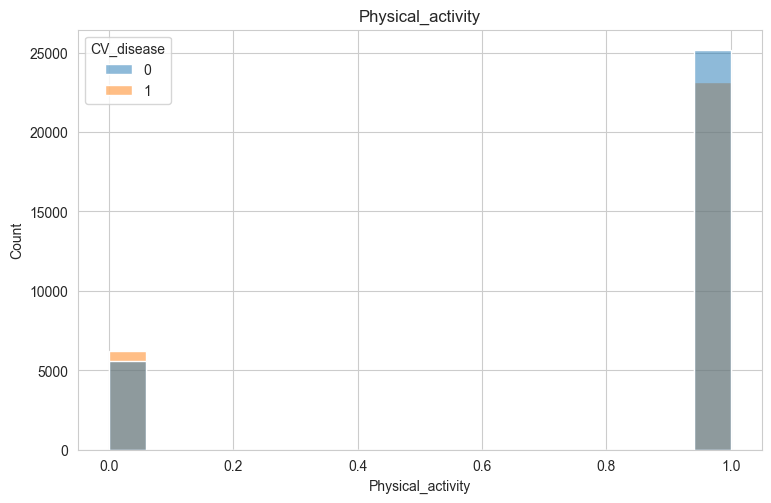

In [31]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[10]], hue="CV_disease")
plt.title(column[10])
plt.show()

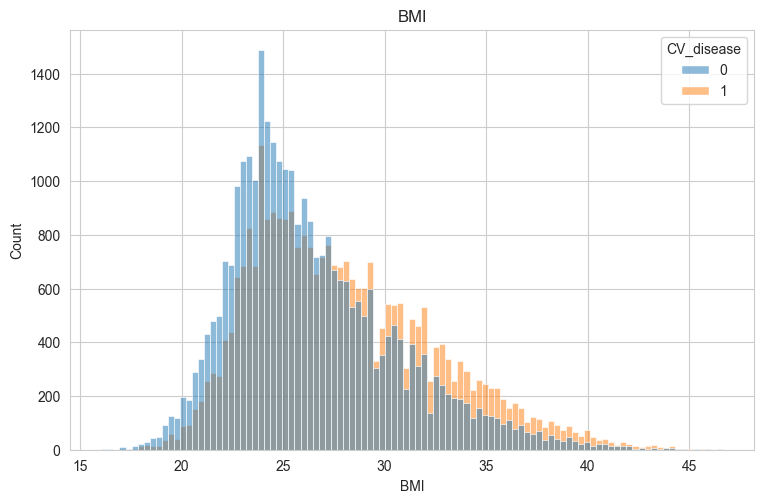

In [32]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[11]], hue="CV_disease")
plt.title(column[11])
plt.show()

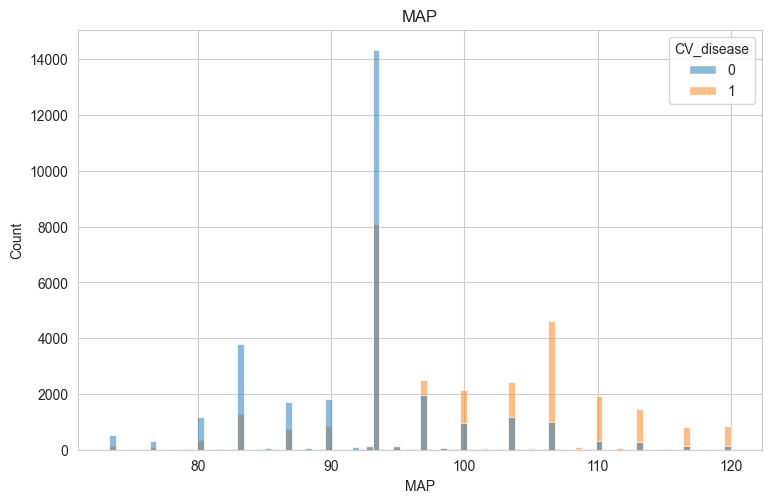

In [33]:
plt.figure(figsize=(30,12))
plt.subplot(2,3,1)
sns.histplot(data=data, x=data[column[12]], hue="CV_disease")
plt.title(column[12])
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

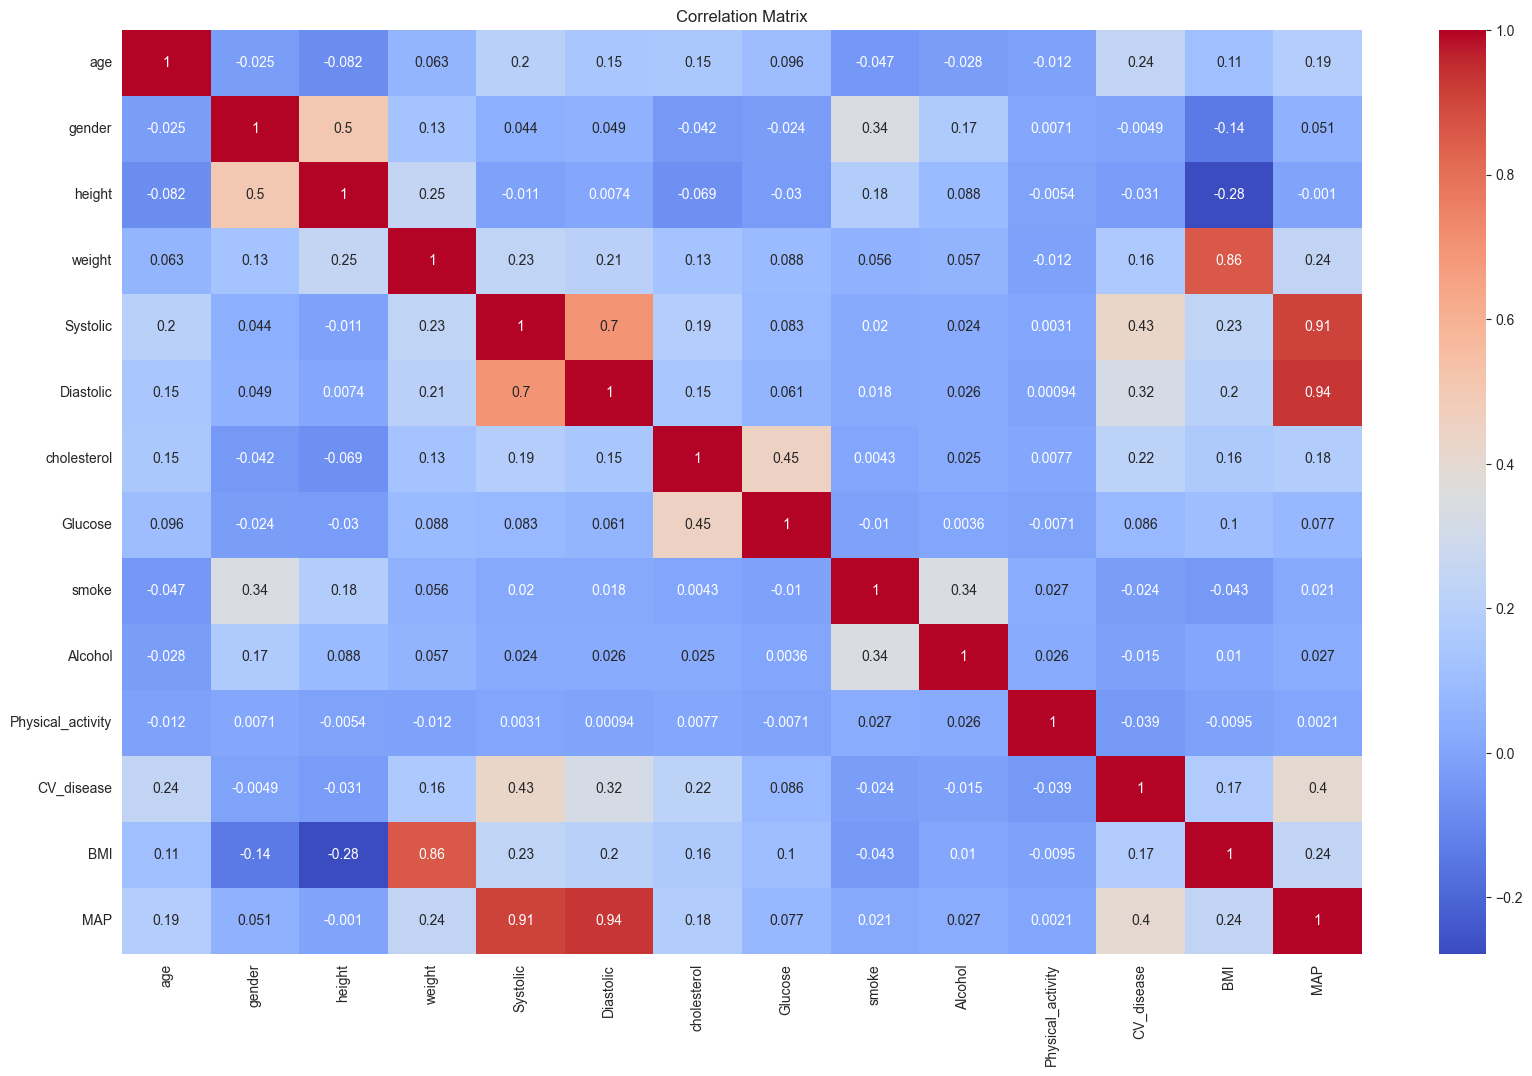

In [34]:
# Create a heatmap to visualize the correlations between the features
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [35]:
def f(x):
    if ((x >= 40) & (x < 60)):
        return 1
    elif ((x >= 60) & (x < 80)):
        return 2
    elif ((x >= 80)):
        return 3

In [36]:
data['age'] = data['age'].apply(f)

In [37]:
def bmi(x):
  if ((x < 18.5)):
      return 1
  elif ((x >= 18.5) & (x < 24.9)):
      return 2
  elif ((x >= 25) & (x < 29.9)):
      return 3
  else:
    return 4

In [38]:
data['BMI'] = data['BMI'].apply(bmi)

In [39]:
def map(x):
  if ((x >=70) & (x < 80)):
      return 1
  elif ((x >=80) & (x < 90)):
      return 2
  elif ((x >=90) & (x < 100)):
      return 3
  elif ((x >= 100) & (x < 110)):
      return 4
  elif ((x >= 110) & (x < 120)):
      return 5

In [40]:
data['MAP'] = data['MAP'].apply(map)

In [41]:
data1 = data[["age","gender","cholesterol","Glucose","smoke","Alcohol","Physical_activity","BMI","MAP"]]

In [42]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(data1, columns=["age","gender","cholesterol","Glucose","smoke","Alcohol","Physical_activity","BMI","MAP"])


In [43]:
df.head(5)

,age_1.0,age_2.0,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,Glucose_1,Glucose_2,Glucose_3,...,Physical_activity_1,BMI_1,BMI_2,BMI_3,BMI_4,MAP_1.0,MAP_2.0,MAP_3.0,MAP_4.0,MAP_5.0
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [44]:
df=df.reset_index()

In [45]:
data = data.reset_index()

In [46]:
data2 = data[["id","CV_disease"]]
Table = pd.merge(df,data2,on = "id",how = "left") 

In [47]:
Table.columns

Index(['id', 'age_1.0', 'age_2.0', 'gender_1', 'gender_2', 'cholesterol_1',
       'cholesterol_2', 'cholesterol_3', 'Glucose_1', 'Glucose_2', 'Glucose_3',
       'smoke_0', 'smoke_1', 'Alcohol_0', 'Alcohol_1', 'Physical_activity_0',
       'Physical_activity_1', 'BMI_1', 'BMI_2', 'BMI_3', 'BMI_4', 'MAP_1.0',
       'MAP_2.0', 'MAP_3.0', 'MAP_4.0', 'MAP_5.0', 'CV_disease'],
      dtype='object')

In [48]:
X = Table[['age_1.0', 'age_2.0', 'gender_1', 'gender_2', 'cholesterol_1',
       'cholesterol_2', 'cholesterol_3', 'Glucose_1', 'Glucose_2', 'Glucose_3',
       'smoke_0', 'smoke_1', 'Alcohol_0', 'Alcohol_1', 'Physical_activity_0',
       'Physical_activity_1', 'BMI_1', 'BMI_2', 'BMI_3', 'BMI_4', 'MAP_1.0',
       'MAP_2.0', 'MAP_3.0', 'MAP_4.0', 'MAP_5.0']]
y = Table[['CV_disease']]

In [49]:
df = pd.read_csv('cardio_train.csv',sep=';')
df.head() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [51]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [52]:
# Standardize the features
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [53]:
# Importing the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Creating a logistic regression model
log_reg = LogisticRegression(random_state=42)

# Defining the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


grid_log_reg = GridSearchCV(log_reg, param_grid, cv=5)
grid_log_reg.fit(x_train, y_train)
best_params_log_reg = grid_log_reg.best_params_
log_reg = LogisticRegression(random_state=42, C=best_params_log_reg['C'], penalty=best_params_log_reg['penalty'], solver=best_params_log_reg['solver'])
log_reg.fit(x_train, y_train)
log_reg_predicted = log_reg.predict(x_test)
# Calculating the accuracy score
log_reg_acc_score = accuracy_score(y_test, log_reg_predicted)
# Generating the classification report
log_reg_report = classification_report(y_test, log_reg_predicted)
# Printing the results
print("Accuracy of Logistic Regression:", log_reg_acc_score * 100)
print("Classification Report for Logistic Regression:\n", log_reg_report)


Accuracy of Logistic Regression: 72.08571428571429
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Creating a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Defining the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Using GridSearchCV to find the best hyperparameters
grid_decision_tree = GridSearchCV(decision_tree, param_grid, cv=5)
grid_decision_tree.fit(x_train, y_train)
best_params_decision_tree = grid_decision_tree.best_params_

# Creating the Decision Tree classifier with best hyperparameters
decision_tree = DecisionTreeClassifier(random_state=42,
                                       max_depth=best_params_decision_tree['max_depth'],
                                       min_samples_split=best_params_decision_tree['min_samples_split'],
                                       min_samples_leaf=best_params_decision_tree['min_samples_leaf'])
decision_tree.fit(x_train, y_train)

# Making predictions and calculating accuracy score
decision_tree_predicted = decision_tree.predict(x_test)
decision_tree_acc_score = accuracy_score(y_test, decision_tree_predicted)

# Generating the classification report
decision_tree_report = classification_report(y_test, decision_tree_predicted)

# Printing the results
print("Accuracy of Decision Tree classifier:", decision_tree_acc_score * 100)
print("Classification Report for Decision Tree classifier:\n", decision_tree_report)


Accuracy of Decision Tree classifier: 73.20714285714286
Classification Report for Decision Tree classifier:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Creating a Naive Bayes classifier
naive_bayes = GaussianNB()

# Training the classifier on the training set
naive_bayes.fit(x_train, y_train)

# Making predictions and calculating accuracy score
naive_bayes_predicted = naive_bayes.predict(x_test)
naive_bayes_acc_score = accuracy_score(y_test, naive_bayes_predicted)

# Generating the classification report
naive_bayes_report = classification_report(y_test, naive_bayes_predicted)

# Printing the results
print("Accuracy of Naive Bayes classifier:", naive_bayes_acc_score * 100)
print("Classification Report for Naive Bayes classifier:\n", naive_bayes_report)


Accuracy of Naive Bayes classifier: 59.35
Classification Report for Naive Bayes classifier:
               precision    recall  f1-score   support

           0       0.56      0.87      0.68      6988
           1       0.71      0.32      0.44      7012

    accuracy                           0.59     14000
   macro avg       0.64      0.59      0.56     14000
weighted avg       0.64      0.59      0.56     14000

